In [3]:
# library
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

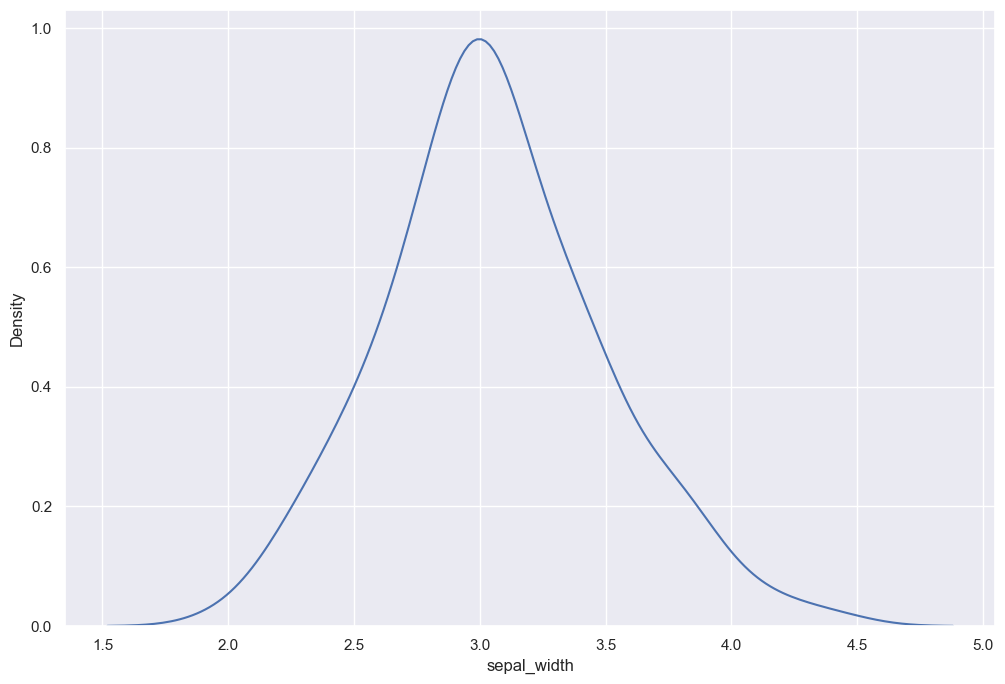

In [32]:
df = sns.load_dataset('iris')

sns.kdeplot(df['sepal_width'])

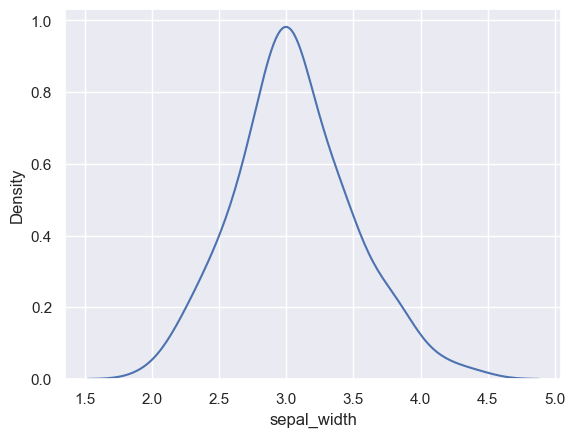

In [5]:
sns.set(style="darkgrid")
sns.kdeplot(df['sepal_width'])
plt.show()

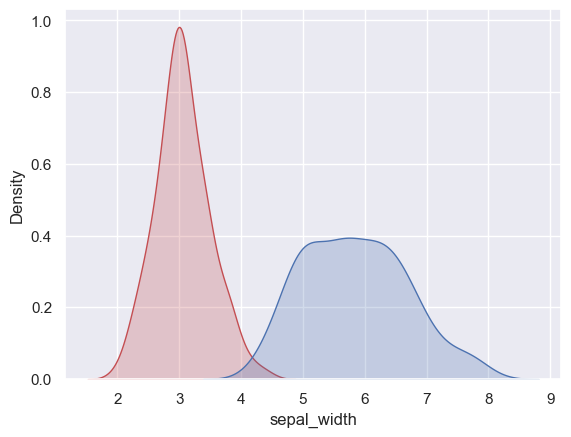

In [6]:
fig = sns.kdeplot(df['sepal_width'], shade=True, color="r")
fig = sns.kdeplot(df['sepal_length'], shade=True, color="b")
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


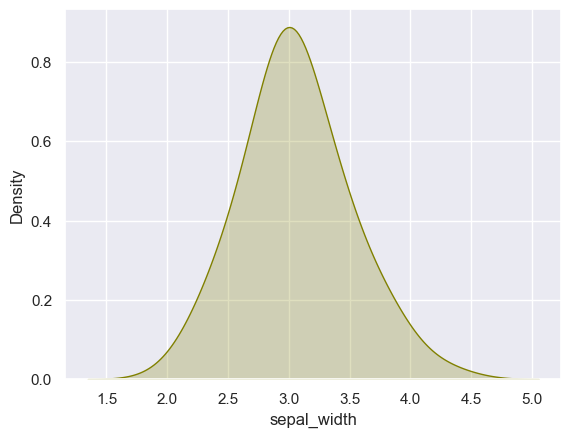

In [10]:
# bw(bandwidth)를 조절하여 스무스하게 나타내거나 촘촘히 나타내거나 할 수 있음 
sns.kdeplot(df['sepal_width'], shade=True, bw=0.5, color="olive")
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


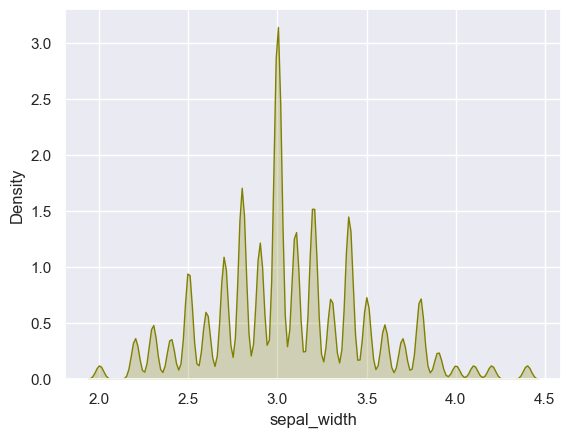

In [8]:
sns.kdeplot(df['sepal_width'], shade=True, bw=0.05, color='olive')
plt.show()

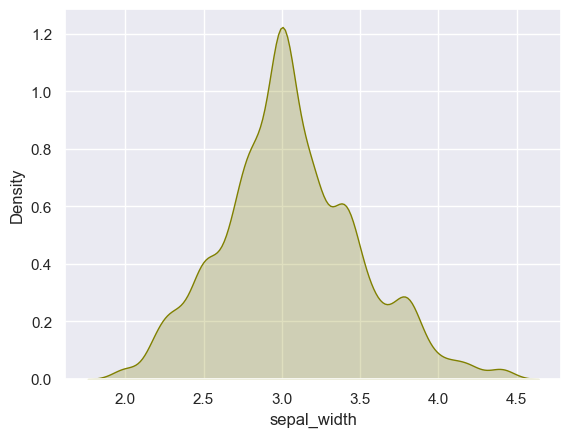

In [12]:
# bw는 이제 사라질 파라미터이므로 bw_adjust를 활용하도록 해야한다.
sns.kdeplot(df['sepal_width'], shade=True, bw_adjust=0.5, color='olive')
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


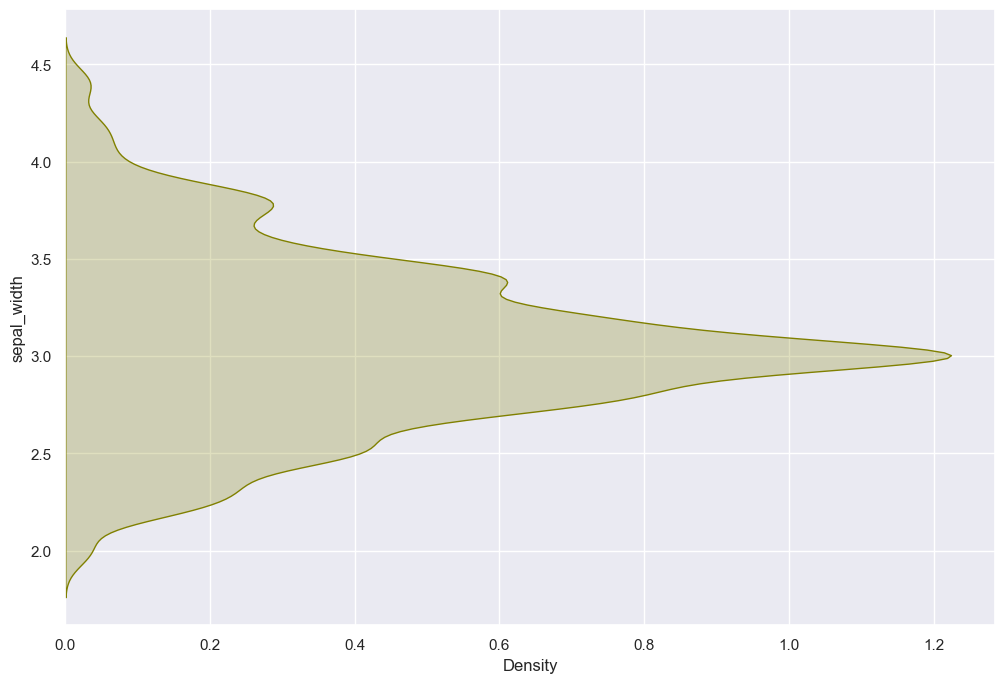

In [33]:
# vertical을 True로 90도 돌릴 수 있다.
sns.kdeplot(df['sepal_width'], shade=True, bw_adjust=0.5, color='olive', vertical=True)
plt.show()

In [ ]:
# libraries
import numpy as np
from numpy import linspace
import pandas as pd
from scipy.stats import gaussian_kde

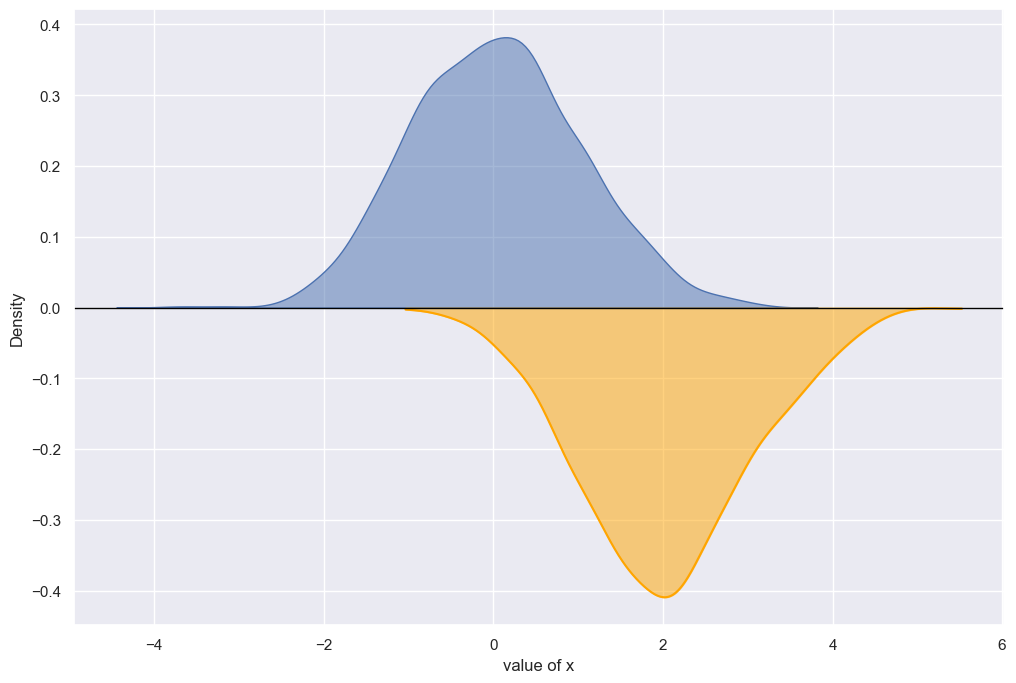

In [30]:
# dataframe
df = pd.DataFrame({
'var1': np.random.normal(size=1000),
'var2': np.random.normal(loc=2, size=1000) * -1
})

# Fig size
plt.rcParams["figure.figsize"]=12,8

# plot density chart for var1
# alpha값으로 투명도를 조절
sns.kdeplot(data=df, x="var1", fill=True, alpha=.5)

# plot density chart for var2
kde = gaussian_kde(df.var2)
x_range = linspace(min(df.var2), max(df.var2), len(df.var2))

# multiply by -1 to reverse axis (mirror plot)
sns.lineplot(x=x_range*-1, y=kde(x_range) * -1, color='orange') 
plt.fill_between(x_range*-1, kde(x_range) * -1, color='orange', alpha = .5)

# add axis names        
plt.xlabel("value of x")
plt.axhline(y=0, linestyle='-',linewidth=1, color='black')



# show the graph
plt.show()

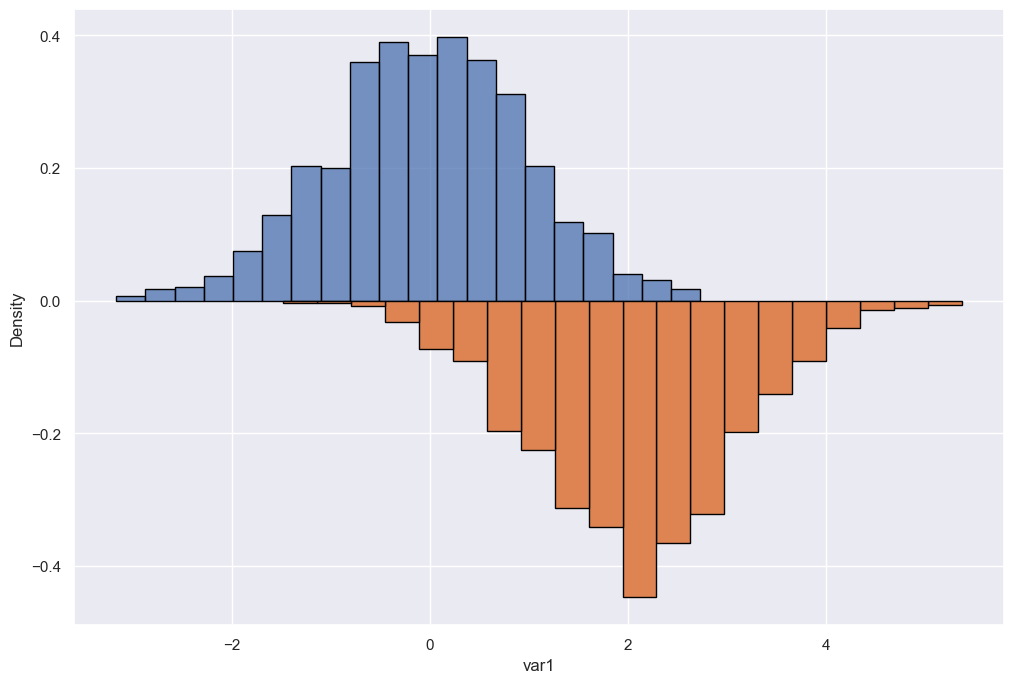

In [17]:
# 변수1의 히스토그램
sns.histplot(x=df.var1, stat="density", bins=20, edgecolor='black')

# 변수2의 히스토그램
n_bins = 20
# get positions and heights of bars
heights, bins = np.histogram(df.var2, density=True, bins=n_bins) 
# -1을 곱해서 아래쪽으로 내리기
heights *= -1
bin_width = np.diff(bins)[0]
bin_pos =( bins[:-1] + bin_width / 2) * -1

# plot
plt.bar(bin_pos, heights, width=bin_width, edgecolor='black')

# show the graph
plt.show()

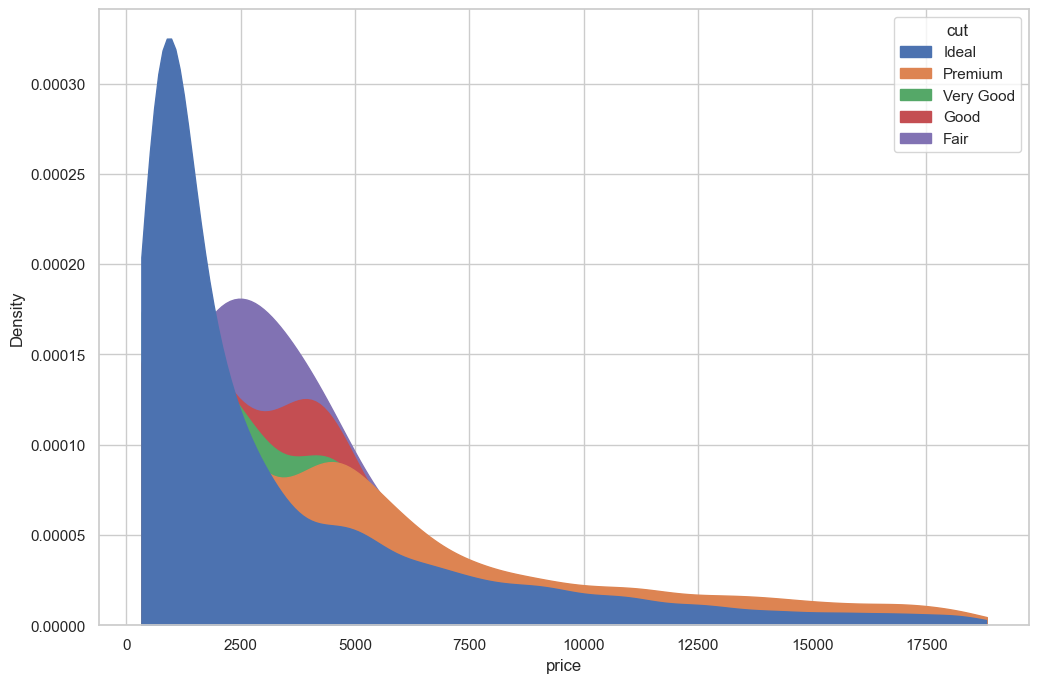

In [42]:
diamond=sns.load_dataset('diamonds', cache=True, data_home=None)

plt.rcParams["figure.figsize"]=12,8
sns.set(style="whitegrid")

sns.kdeplot(data=diamond, x="price", hue="cut", cut=0, fill=True, common_norm=False, alpha=1) # alpha값 변경하여 보기 좋게 변경 가능
plt.show()

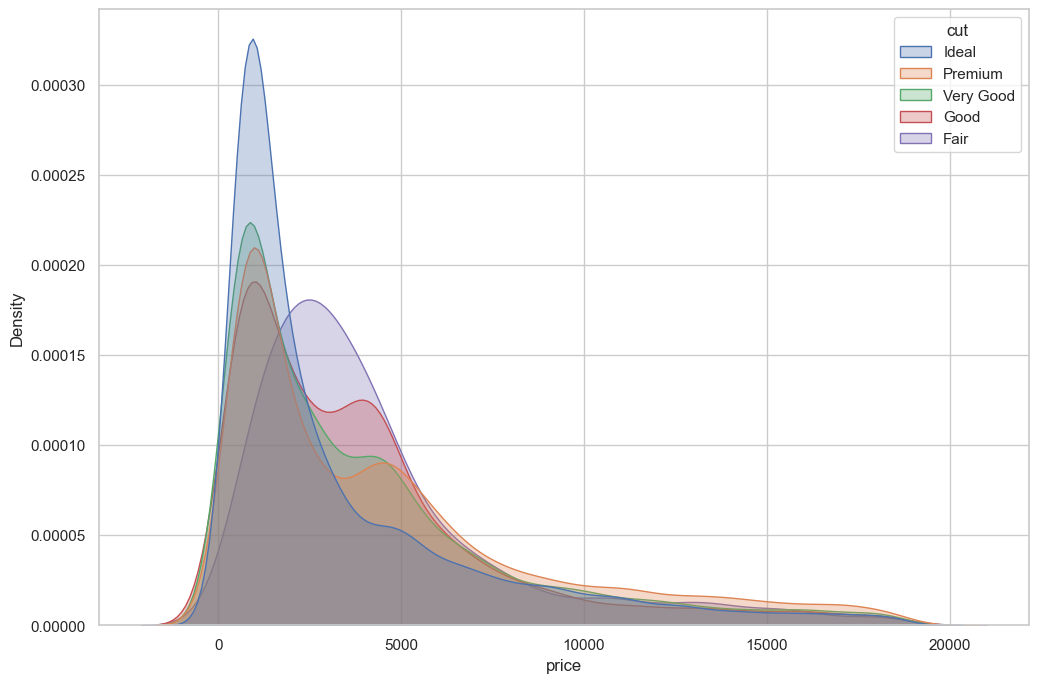

In [44]:
# 0미만은 사실 없지만 매끄럽게 하기위해 cut 파라미터를 지움
sns.kdeplot(data=diamond, x="price", hue="cut", fill=True, common_norm=False, alpha=.3) 
plt.show()

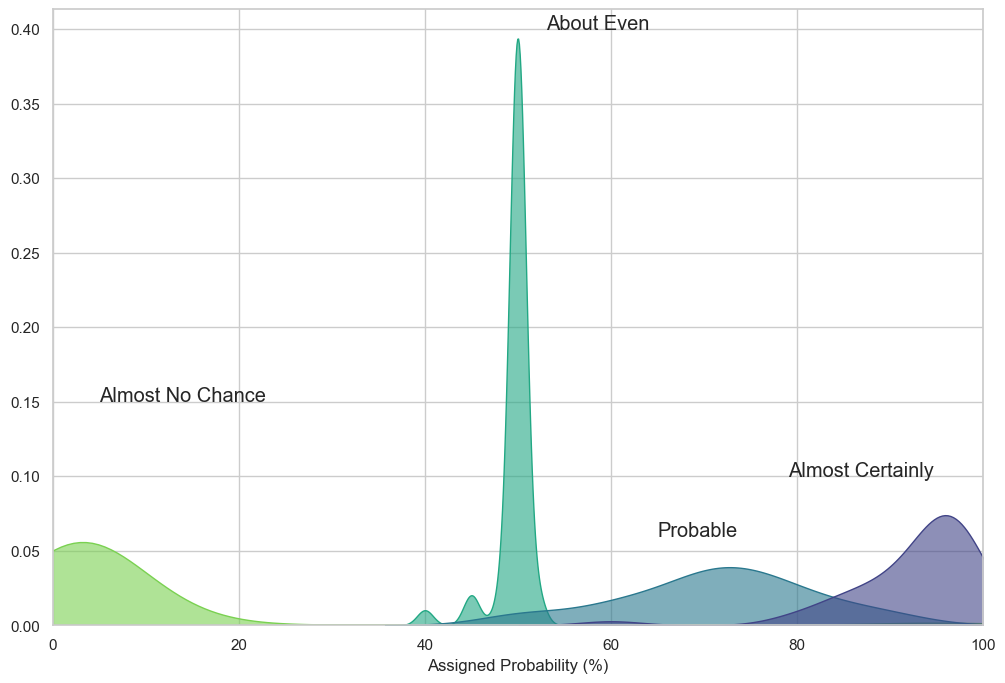

In [45]:
sns.set(style="whitegrid")

# 데이터셋
data = pd.read_csv("https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv")
data = pd.melt(data, var_name='text', value_name='value')

# "Almost No Chance", "About Even", "Probable", "Almost Certainly"만 가져오기
data = data.loc[data.text.isin(["Almost No Chance","About Even","Probable","Almost Certainly"])]

# kde plot
p = sns.kdeplot(data=data, x="value", hue="text", fill=True, common_norm=False, alpha=0.6, palette="viridis", legend=False)
# x limit 설정
plt.xlim(0, 100)

# 집어넣을 텍스트에 대한 좌표 설정
annot = pd.DataFrame({
'x': [5, 53, 65, 79],
'y': [0.15, 0.4, 0.06, 0.1],
'text': ["Almost No Chance", "About Even", "Probable", "Almost Certainly"]
})

# 포문으로 텍스트 넣기
for point in range(0,len(annot)):
     p.text(annot.x[point], annot.y[point], annot.text[point], horizontalalignment='left', size='large')

plt.xlabel("Assigned Probability (%)")
plt.ylabel("")
plt.show()

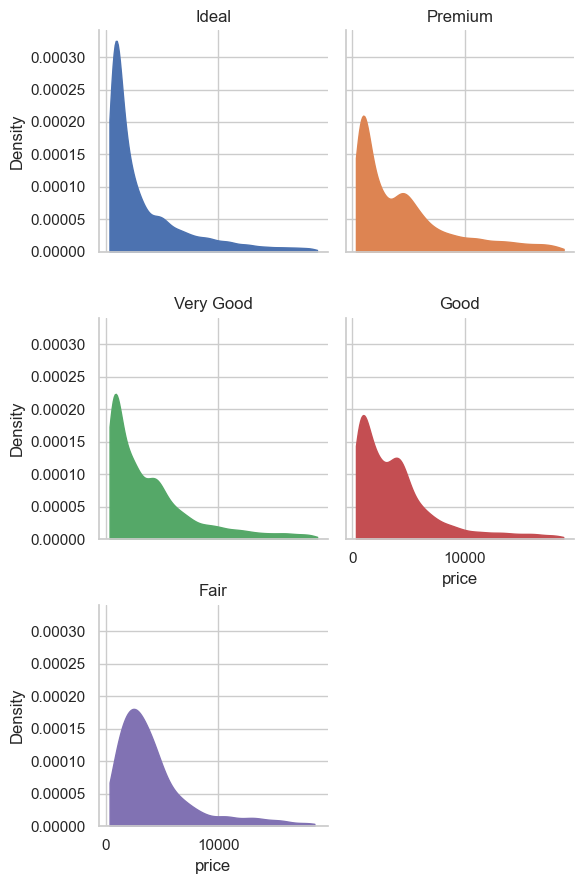

In [49]:
# FacetGrid 이용!
# matplotlib의 subplots를 사용하지 않고 여러개 그리기
# col_wrap의 수로 컬럼수를 조절하여 카테고리별로 나타낸다.
g = sns.FacetGrid(diamond, col='cut', hue='cut', col_wrap=2)

g = g.map(sns.kdeplot,"price", cut=0, fill=True, common_norm=False, alpha=1, legend=False)

# 제목 세팅
g = g.set_titles("{col_name}")

plt.show()

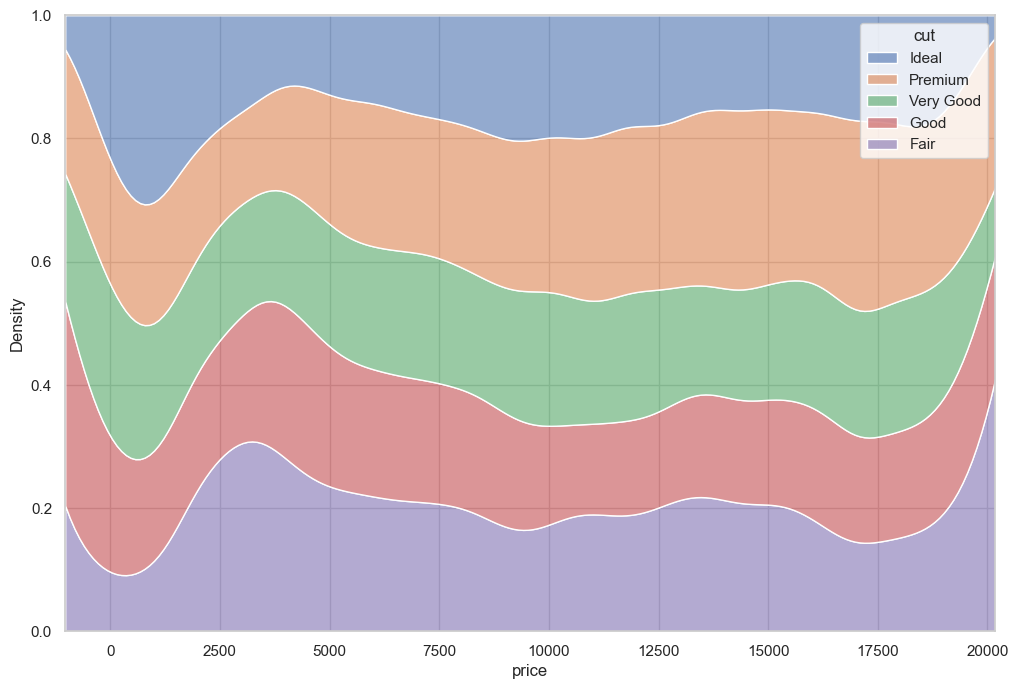

In [57]:
# stacked density plot
sns.kdeplot(data=diamond, x="price", hue="cut", common_norm=False, multiple="fill", alpha=.6)
plt.show()

In [59]:
df = sns.load_dataset('iris')

In [60]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

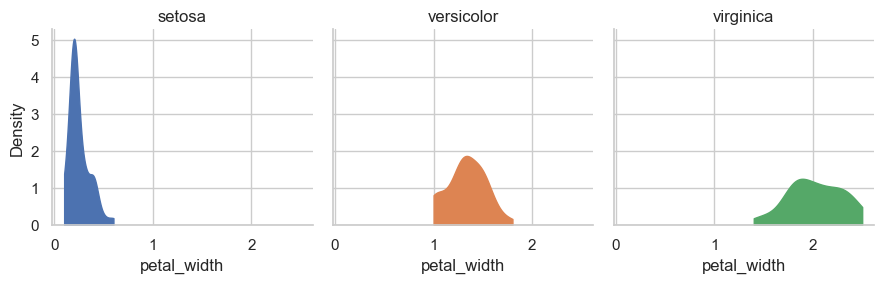

In [64]:
g = sns.FacetGrid(df, col='species', hue='species', col_wrap=3)
g = g.map(sns.kdeplot,"petal_width", cut=0, fill=True, common_norm=False, alpha=1, legend=False)
g = g.set_titles("{col_name}")
plt.show()

In [8]:
import pandas as pd
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

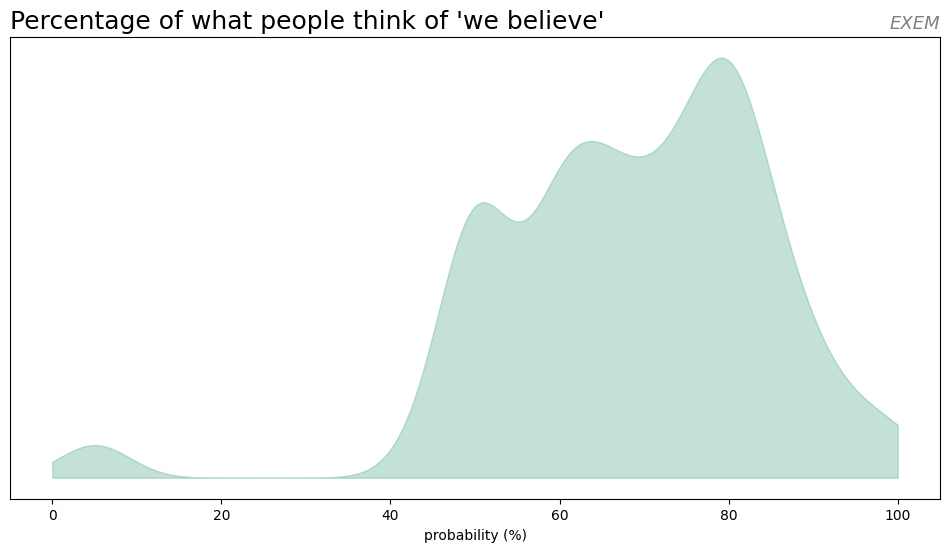

In [20]:
# matplotlib을 활용해서 밀도함수 그리기
# 데이터셋 불러오기
data = pd.read_csv("https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv")
data = pd.melt(data, var_name='text', value_name='value')

data = data.loc[data.text.isin(["We Believe"])]

# gaussian_kde로 밀도함수추정
density = gaussian_kde(data.value)
density.covariance_factor = lambda : .25
density._compute_covariance()

# 0에서 100사이에 200개의 값을 채워넣기
xs = np.linspace(0, 100, 200)

plt.figure(figsize=(12,6))
plt.fill_between( xs, density(xs), color="#69b3a2", alpha=0.4)

# title
plt.title("Percentage of what people think of 'we believe'", loc='left', fontsize=18)
plt.title("EXEM", loc='right', fontsize=13, color='grey', style='italic')

# Axis name
plt.xlabel("probability (%)")

# Remove Y axis
plt.yticks([])
plt.show()